In [35]:
import pandas as pd
import matplotlib.pyplot as plt


from typing import Set, Dict, List, Tuple
from collections import defaultdict
from benchmark_organiser import BenchmarkOrganiser

In [14]:
joinbench = pd.read_json("../../../data/joinbench100.json")

In [19]:
names = joinbench["reportName"]

In [20]:
names

0                    join on onePercent/modular product
1                  join on onePercent/old comprehension
2                    join on onePercent/modular indexed
3     join onePercent and twentyPercent/modular product
4     join onePercent and twentyPercent/old comprehe...
5     join onePercent and twentyPercent/modular indexed
6      join onePercent and fiftyPercent/modular product
7     join onePercent and fiftyPercent/old comprehen...
8      join onePercent and fiftyPercent/modular indexed
9                     join even and odd/modular product
10                  join even and odd/old comprehension
11                    join even and odd/modular indexed
Name: reportName, dtype: object

In [38]:
group_names = BenchmarkOrganiser.get_benchmark_group_names(names)
group_names

{'join even and odd',
 'join on onePercent',
 'join onePercent and fiftyPercent',
 'join onePercent and twentyPercent'}

In [40]:
group_map = BenchmarkOrganiser.map_benchmark_groups_and_benchmark_indices(names)
group_map

defaultdict(list,
            {'join on onePercent': [(0, 'modular product'),
              (1, 'old comprehension'),
              (2, 'modular indexed')],
             'join onePercent and twentyPercent': [(3, 'modular product'),
              (4, 'old comprehension'),
              (5, 'modular indexed')],
             'join onePercent and fiftyPercent': [(6, 'modular product'),
              (7, 'old comprehension'),
              (8, 'modular indexed')],
             'join even and odd': [(9, 'modular product'),
              (10, 'old comprehension'),
              (11, 'modular indexed')]})

In [72]:
joinbench["reportAnalysis"][0]['anMean']['estPoint']

3.135428690914186e-08

In [78]:
def get_mean(data, index: int) -> float:
    return data["reportAnalysis"][index]['anMean']['estPoint']
    
def get_means(data, indices: List[int]) -> List[float]:
    means: List[float] = []
    
    index: int
    for index in indices:
        means.append(get_mean(data, index))
        
    return means

In [79]:
get_mean(joinbench, 0)

3.135428690914186e-08

In [88]:
def plot_benchmark_group_means(ax, data, group_name: str):
    group_map = BenchmarkOrganiser.map_benchmark_groups_and_benchmark_indices(data['reportName'])
    experiments = group_map[group_name]

    indices, names = zip(*experiments)
    means = get_means(joinbench, indices)

    ax.set_title(f"Mean time to complete {group_name}")
    ax.set_ylabel("time (s)")
    ax.set_xlabel("function")
    
    ax.bar(names, means)
    
    return ax
    

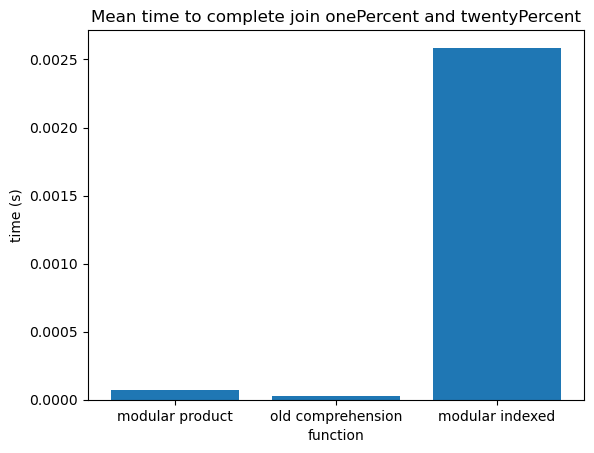

In [102]:
fig, ax = plt.subplots()
for group_name in group_names:
    plot_benchmark_group_means(ax, joinbench, group_name)
    plt.show()







